In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('diabetes.csv')

In [50]:
print("Dataset shakli:", df.shape)
print("\nDataset haqida umumiy ma'lumotlar:")
print(df.info())

Dataset shakli: (768, 9)

Dataset haqida umumiy ma'lumotlar:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [72]:
print("Birinchi 5 qator:")
df.head()

Birinchi 5 qator:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
print("\nStatistik ko'rsatkichlar:")
df.describe()


Statistik ko'rsatkichlar:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [53]:
# Target variable (Outcome) tahlili
print("Diabet holatlari:")
print(df['Outcome'].value_counts())

# Foizlar
total = len(df)
diabetes_count = df['Outcome'].value_counts().get(1, 0)
no_diabetes_count = total - diabetes_count

print(f"\nUmumiy bemorlar soni: {total}")
print(f"Diabet bor: {diabetes_count} ({diabetes_count/total*100:.1f}%)")
print(f"Diabet yo'q: {no_diabetes_count} ({no_diabetes_count/total*100:.1f}%)")

Diabet holatlari:
Outcome
0    500
1    268
Name: count, dtype: int64

Umumiy bemorlar soni: 768
Diabet bor: 268 (34.9%)
Diabet yo'q: 500 (65.1%)


## 2. Markaziy tendensiya va tarqoqlik tahlili

O'tgan darslarda o'rgangan markaziy tendensiya (o'rtacha, mediana, moda) va tarqoqlik (standart og'ish, dispersiya, IQR) ko'rsatkichlarini qo'llaymiz.

In [54]:
# Asosiy ustunlarni ajratish
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Har bir ustun uchun asosiy statistikalar
for col in numeric_columns:
    print(f"\n{col}:")
    print(f"  O'rtacha: {df[col].mean():.2f}")
    print(f"  Mediana: {df[col].median():.2f}")
    print(f"  Standart og'ish: {df[col].std():.2f}")
    print(f"  Min: {df[col].min():.2f}")
    print(f"  Max: {df[col].max():.2f}")


Pregnancies:
  O'rtacha: 3.85
  Mediana: 3.00
  Standart og'ish: 3.37
  Min: 0.00
  Max: 17.00

Glucose:
  O'rtacha: 120.89
  Mediana: 117.00
  Standart og'ish: 31.97
  Min: 0.00
  Max: 199.00

BloodPressure:
  O'rtacha: 69.11
  Mediana: 72.00
  Standart og'ish: 19.36
  Min: 0.00
  Max: 122.00

SkinThickness:
  O'rtacha: 20.54
  Mediana: 23.00
  Standart og'ish: 15.95
  Min: 0.00
  Max: 99.00

Insulin:
  O'rtacha: 79.80
  Mediana: 30.50
  Standart og'ish: 115.24
  Min: 0.00
  Max: 846.00

BMI:
  O'rtacha: 31.99
  Mediana: 32.00
  Standart og'ish: 7.88
  Min: 0.00
  Max: 67.10

DiabetesPedigreeFunction:
  O'rtacha: 0.47
  Mediana: 0.37
  Standart og'ish: 0.33
  Min: 0.08
  Max: 2.42

Age:
  O'rtacha: 33.24
  Mediana: 29.00
  Standart og'ish: 11.76
  Min: 21.00
  Max: 81.00


In [55]:
# Diabet holati bo'yicha taqqoslash
print("DIABET HOLATI BO'YICHA TAQQOSLASH")
print("=" * 40)

for col in numeric_columns:
    # Diabet yo'q bemorlar
    no_diabetes = df[df['Outcome'] == 0][col].mean()
    
    # Diabet bor bemorlar
    diabetes = df[df['Outcome'] == 1][col].mean()
    
    # Farq
    difference = diabetes - no_diabetes
    
    print(f"\n{col}:")
    print(f"  Diabet yo'q: {no_diabetes:.2f}")
    print(f"  Diabet bor: {diabetes:.2f}")
    print(f"  Farq: {difference:.2f}")

DIABET HOLATI BO'YICHA TAQQOSLASH

Pregnancies:
  Diabet yo'q: 3.30
  Diabet bor: 4.87
  Farq: 1.57

Glucose:
  Diabet yo'q: 109.98
  Diabet bor: 141.26
  Farq: 31.28

BloodPressure:
  Diabet yo'q: 68.18
  Diabet bor: 70.82
  Farq: 2.64

SkinThickness:
  Diabet yo'q: 19.66
  Diabet bor: 22.16
  Farq: 2.50

Insulin:
  Diabet yo'q: 68.79
  Diabet bor: 100.34
  Farq: 31.54

BMI:
  Diabet yo'q: 30.30
  Diabet bor: 35.14
  Farq: 4.84

DiabetesPedigreeFunction:
  Diabet yo'q: 0.43
  Diabet bor: 0.55
  Farq: 0.12

Age:
  Diabet yo'q: 31.19
  Diabet bor: 37.07
  Farq: 5.88


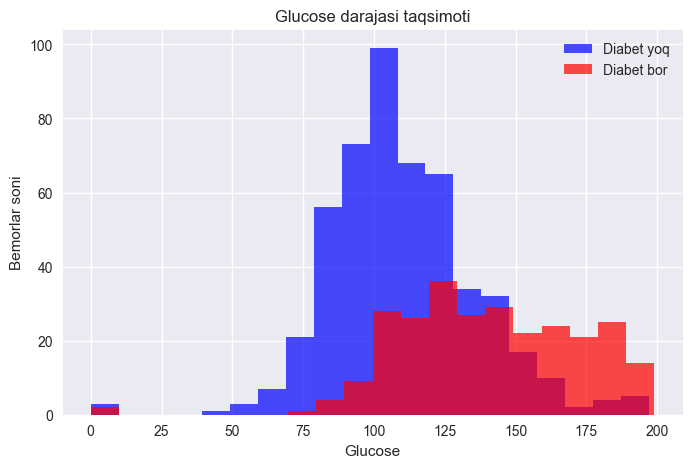

In [56]:
# Oddiy histogramma (Glucose uchun misol)
plt.figure(figsize=(8, 5))

# Diabet yo'q bemorlar
no_diabetes_glucose = df[df['Outcome'] == 0]['Glucose']
plt.hist(no_diabetes_glucose, bins=20, alpha=0.7, label='Diabet yoq', color='blue')

# Diabet bor bemorlar
diabetes_glucose = df[df['Outcome'] == 1]['Glucose']
plt.hist(diabetes_glucose, bins=20, alpha=0.7, label='Diabet bor', color='red')

plt.title('Glucose darajasi taqsimoti')
plt.xlabel('Glucose')
plt.ylabel('Bemorlar soni')
plt.legend()
plt.show()

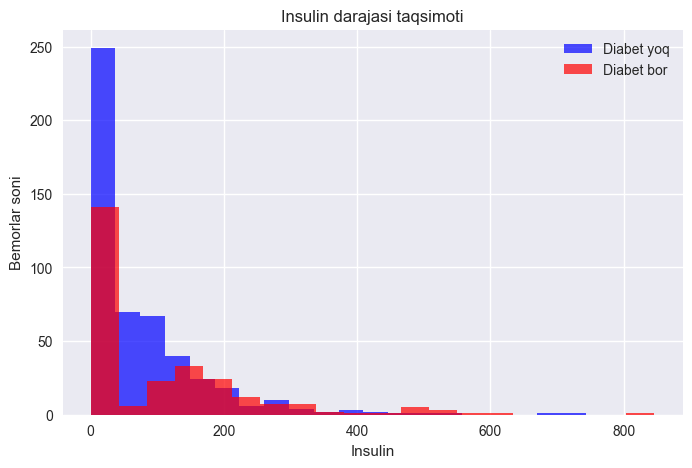

In [57]:
# Oddiy histogramma (Insulin uchun misol)
plt.figure(figsize=(8, 5))

# Diabet yo'q bemorlar
no_diabetes_glucose = df[df['Outcome'] == 0]['Insulin']
plt.hist(no_diabetes_glucose, bins=20, alpha=0.7, label='Diabet yoq', color='blue')

# Diabet bor bemorlar
diabetes_insulin = df[df['Outcome'] == 1]['Insulin']
plt.hist(diabetes_insulin, bins=20, alpha=0.7, label='Diabet bor', color='red')

plt.title('Insulin darajasi taqsimoti')
plt.xlabel('Insulin')
plt.ylabel('Bemorlar soni')
plt.legend()
plt.show()

## 3. Taqsimotlar tahlili va histogramlar

O'tgan darslarda o'rgangan taqsimotlar bilimidan foydalanib, har bir xususiyatning taqsimotini tahlil qilamiz.

## 4. Outlier (chetga chiquvchi qiymatlar) aniqlash

O'tgan darslarda o'rgangan IQR va Z-score usullari bilan outlierlarni aniqlaymiz.

In [58]:
# Outlier aniqlash (IQR usuli)
print("OUTLIER TAHLILI (IQR usuli)")
print("=" * 35)

for col in numeric_columns:
    # IQR hisoblash
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Outlier chegaralari
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Outlierlar soni
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    
    print(f"\n{col}:")
    print(f"  Q1: {Q1:.2f}")
    print(f"  Q3: {Q3:.2f}")
    print(f"  IQR: {IQR:.2f}")
    print(f"  Outlierlar: {outlier_count} ta ({outlier_count/len(df)*100:.1f}%)")

OUTLIER TAHLILI (IQR usuli)

Pregnancies:
  Q1: 1.00
  Q3: 6.00
  IQR: 5.00
  Outlierlar: 4 ta (0.5%)

Glucose:
  Q1: 99.00
  Q3: 140.25
  IQR: 41.25
  Outlierlar: 5 ta (0.7%)

BloodPressure:
  Q1: 62.00
  Q3: 80.00
  IQR: 18.00
  Outlierlar: 45 ta (5.9%)

SkinThickness:
  Q1: 0.00
  Q3: 32.00
  IQR: 32.00
  Outlierlar: 1 ta (0.1%)

Insulin:
  Q1: 0.00
  Q3: 127.25
  IQR: 127.25
  Outlierlar: 34 ta (4.4%)

BMI:
  Q1: 27.30
  Q3: 36.60
  IQR: 9.30
  Outlierlar: 19 ta (2.5%)

DiabetesPedigreeFunction:
  Q1: 0.24
  Q3: 0.63
  IQR: 0.38
  Outlierlar: 29 ta (3.8%)

Age:
  Q1: 24.00
  Q3: 41.00
  IQR: 17.00
  Outlierlar: 9 ta (1.2%)


## 5. Korrelatsiya tahlili

O'zgaruvchilar orasidagi bog'lanishni ko'rish uchun korrelatsiya tahlilini o'tkazamiz.

In [59]:
# Korrelatsiya tahlili
print("DIABET BILAN KORRELATSIYA")
print("=" * 30)

# Har bir xususiyatning diabet bilan korrelyatsiyasi
for col in numeric_columns:
    correlation = df[col].corr(df['Outcome'])
    print(f"{col}: {correlation:.3f}")

# Eng yuqori korrelatsiyaga ega xususiyatni topish
correlations = {}
for col in numeric_columns:
    correlations[col] = abs(df[col].corr(df['Outcome']))

# Eng yuqori 3 ta
sorted_corr = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
print(f"\nEng yuqori korrelatsiya:")
for i, (feature, corr) in enumerate(sorted_corr[:3]):
    print(f"{i+1}. {feature}: {corr:.3f}")

DIABET BILAN KORRELATSIYA
Pregnancies: 0.222
Glucose: 0.467
BloodPressure: 0.065
SkinThickness: 0.075
Insulin: 0.131
BMI: 0.293
DiabetesPedigreeFunction: 0.174
Age: 0.238

Eng yuqori korrelatsiya:
1. Glucose: 0.467
2. BMI: 0.293
3. Age: 0.238


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [62]:
# Ma'lumotlarni tayyorlash
# X (features) va y (target) ni ajratish
X = df[numeric_columns]  # Barcha xususiyatlar
y = df['Outcome']  # Target variable

print(f"Xususiyatlar soni: {X.shape[1]}")
print(f"Bemorlar soni: {X.shape[0]}")
print(f"Xususiyatlar: {list(X.columns)}")

Xususiyatlar soni: 8
Bemorlar soni: 768
Xususiyatlar: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [64]:
# Train va Test ma'lumotlarga bo'lish
"""
train -> modelga o'qitish uchun kerak bo'ladigan
test -> modelni train tugaganidan keyin test qilish uchun dataset
validation -> modelni o'qitish jarayonida tekshirish uchun dataset

70 / 20 / 10
80 / 15 / 5
80 / 0 / 20 

"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("TRAIN-TEST BO'LISH")

print(f"Train ma'lumotlar: {X_train.shape[0]} bemor")
print(f"Test ma'lumotlar: {X_test.shape[0]} bemor")
print(f"Train diabet foizi: {y_train.mean()*100:.1f}%")
print(f"Test diabet foizi: {y_test.mean()*100:.1f}%")

TRAIN-TEST BO'LISH
Train ma'lumotlar: 614 bemor
Test ma'lumotlar: 154 bemor
Train diabet foizi: 34.7%
Test diabet foizi: 35.7%


In [65]:
# Model yaratish
model = LogisticRegression(random_state=42)

# Modelni train ma'lumotlarda o'qitish
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [66]:
print(f"Ishlatilgan xususiyatlar soni: {len(model.coef_[0])}")

Ishlatilgan xususiyatlar soni: 8


In [67]:
y_pred = model.predict(X_test)

print(f"Test ma'lumotlar soni: {len(y_test)}")
print(f"Bashorat qilingan diabet holatlari: {y_pred.sum()}")
print(f"Haqiqiy diabet holatlari: {y_test.sum()}")

# Aniqlik (accuracy) hisoblash
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel aniqligi: {accuracy:.3f} ({accuracy*100:.1f}%)")

Test ma'lumotlar soni: 154
Bashorat qilingan diabet holatlari: 58
Haqiqiy diabet holatlari: 55

Model aniqligi: 0.747 (74.7%)


In [71]:
# Yangi bemor ma'lumotlari (misol)
new_patient = np.array([[4, 150, 60, 25, 100, 25.0, 0.2, 60]])

# Bashorat qilish
prediction = model.predict(new_patient)[0]
probability = model.predict_proba(new_patient)[0]

print("Bemor ma'lumotlari:")
features_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                  'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i, feature in enumerate(features_names):
    print(f"  {feature}: {new_patient[0][i]}")

print(f"\nBashorat: {'Diabet bor' if prediction == 1 else 'Diabet yoq'}")
print(f"Diabet ehtimolligi: {probability[1]:.3f} ({probability[1]*100:.1f}%)")

Bemor ma'lumotlari:
  Pregnancies: 4.0
  Glucose: 150.0
  BloodPressure: 60.0
  SkinThickness: 25.0
  Insulin: 100.0
  BMI: 25.0
  DiabetesPedigreeFunction: 0.2
  Age: 60.0

Bashorat: Diabet bor
Diabet ehtimolligi: 0.576 (57.6%)


## Yakuniy xulosa

Bu loyihada biz:

1. **Ma'lumotlarni yukladik** - 768 bemor haqida ma'lumot
2. **Statistik tahlil qildik** - o'rtacha, mediana, standart og'ish
3. **Outlierlar topidik** - IQR usuli bilan
4. **Korrelatsiya hisobladik** - qaysi xususiyat muhimroq
5. **Model yaratdik** - Logistic Regression
6. **Bashorat qildik** - yangi bemorlar uchun

**Asosiy topilma:** Glucose darajasi diabetni bashorat qilishda eng muhim ko'rsatkichdir.

**Keyingi qadamlar:** Ko'proq ma'lumot to'plash va modelni yaxshilash.